In [1]:
""" 
In this dataset, the output is a number between 0 and 1, but it represents two classes. In Keras, it
is recommended to categorize this type of output. This simply means that points with label 0 will
now have a label [1,0], and points with label 1 will now have a label [0,1]. We do this using the
to_categorical function as follows:
"""

import pandas
import numpy
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

import _plotting

# Setting random seeds to get reproducible results
numpy.random.seed(0)
tensorflow.random.set_seed(1)



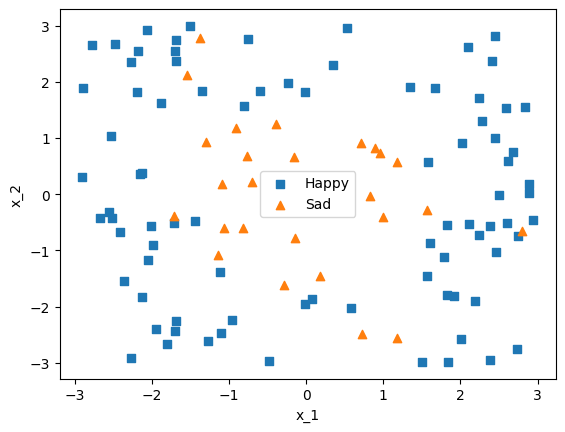

In [2]:
# Read the dataset
data = pandas.read_csv('one_circle.csv', index_col=0)
columns_features = ['x_1', 'x_2']
column_label = 'y'
features = data[columns_features].values
labels = data[column_label].values

_plotting.plot_scatter(data['x_1'][labels == 0], data['x_2'][labels == 0], marker = 's')
_plotting.plot_scatter(data['x_1'][labels == 1], data['x_2'][labels == 1], marker = '^')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Happy', 'Sad'])
plt.show()


In [ ]:
"""
We'll convert the label column to categorical to make it easier for the model to process. It also saves memory too. 
Pandas has a built-in function called factorize, which interprets the number of classes for us. Unlike keras.utils.to_categorical, this returns a 1D-array.
"""

In [3]:
# categorizing the output
series_labels, labels = pandas.factorize(data[column_label])

In [4]:
series_labels, labels

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]),
 Index([0, 1], dtype='int64'))

In [ ]:
""" 
Model Structure
We'll use a sequential model to add a few dense layers with the ReLu activation function. Why are we using sigmoid instead of softmax? 
It's also a common practice to add dropout. It is also a good idea to set our unit sizes as powers of 2, which was a trick for training slightly faster on GPUs. . 
We also use sparse_categorical_crossentropy since our labels are 1D.
"""

# Building the model
num_units_penultimate = 2**6
model = Sequential()
model.add(Dense(2**7, activation='relu', input_shape=(features.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(num_units_penultimate, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(len(labels), activation='sigmoid')) # two classes, else softmax

# Compiling the model
model.compile(
    loss = 'sparse_categorical_crossentropy', # 1D labels, else categorical_crossentropy
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()